In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving 41001h2023.txt to 41001h2023.txt


In [29]:
import pandas as pd

# Load the uploaded file into a DataFrame
df = pd.read_csv('41001h2023.txt', delim_whitespace=True)

# Display the first few rows of the dataset
print(df.head())


    #YY  MM  DD  hh  mm  WDIR  WSPD   GST   WVHT    DPD    APD   MWD    PRES  \
0   #yr  mo  dy  hr  mn  degT   m/s   m/s      m    sec    sec  degT     hPa   
1  2023  01  01  00  00   187  10.3  13.2  99.00  99.00  99.00   999  1019.0   
2  2023  01  01  00  10   188  10.7  13.0   2.36   7.14   6.17   181  1019.2   
3  2023  01  01  00  20   189  10.5  14.7  99.00  99.00  99.00   999  1019.2   
4  2023  01  01  00  30   191  10.2  13.2  99.00  99.00  99.00   999  1019.1   

   ATMP  WTMP   DEWP   VIS   TIDE  
0  degC  degC   degC    mi     ft  
1  22.0  22.0  999.0  99.0  99.00  
2  22.0  22.0  999.0  99.0  99.00  
3  22.0  22.0  999.0  99.0  99.00  
4  22.0  22.0  999.0  99.0  99.00  


<ipython-input-29-ab7367bfd75b>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('41001h2023.txt', delim_whitespace=True)
<ipython-input-29-ab7367bfd75b>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('41001h2023.txt', delim_whitespace=True)


In [6]:
df

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2023,01,01,00,00,187,10.3,13.2,99.00,99.00,99.00,999,1019.0,22.0,22.0,999.0,99.0,99.00
2,2023,01,01,00,10,188,10.7,13.0,2.36,7.14,6.17,181,1019.2,22.0,22.0,999.0,99.0,99.00
3,2023,01,01,00,20,189,10.5,14.7,99.00,99.00,99.00,999,1019.2,22.0,22.0,999.0,99.0,99.00
4,2023,01,01,00,30,191,10.2,13.2,99.00,99.00,99.00,999,1019.1,22.0,22.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50446,2023,12,17,23,40,130,16.1,22.9,5.48,10.0,7.73,130,1008.7,21.0,22.2,18.3,99.0,99.0
50447,2023,12,17,23,50,129,17.0,23.9,99.0,99.0,99.0,999,1008.1,21.0,22.2,18.3,99.0,99.0
50448,2023,12,18,0,0,130,18.0,22.6,99.0,99.0,99.0,999,1007.8,21.1,22.2,18.4,99.0,99.0
50449,2023,12,18,0,10,129,18.2,24.4,5.33,9.09,7.44,125,1007.6,21.1,22.2,18.4,99.0,99.0


In [8]:
df.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451,50451
unique,3,14,63,49,13,723,389,504,1035,54,1166,723,801,405,176,365,3,3
top,2023,03,01,00,40,211,6.0,7.7,99.00,99.00,99.00,999,1015.9,20.3,20.4,999.0,99.0,99.00
freq,32767,4464,1152,1369,5463,316,424,370,21884,21884,21884,21884,374,621,2274,22926,32767,32767


In [30]:
import pandas as pd

# Check for unique values first, as explained in step 1
print("Unique values in '#YY':", df['#YY'].unique())

# Clean the data if necessary, replacing invalid values (like headers or non-numeric data)

# Construct the 'datetime' column using a specific format
df['datetime'] = pd.to_datetime(df['#YY'].astype(str) + '-' +
                                df['MM'].astype(str) + '-' +
                                df['DD'].astype(str) + ' ' +
                                df['hh'].astype(str) + ':' +
                                df['mm'].astype(str),
                                format='%Y-%m-%d %H:%M', errors='coerce')

# Drop rows where datetime could not be parsed (if any)
df = df.dropna(subset=['datetime'])

# Set 'datetime' as the index
df = df.set_index('datetime')

# Assuming 'WTMP' refers to sea surface temperature, assign it to 'SST'
df['SST'] = df['WTMP']

# Verify that the new column 'SST' is of the correct type
print(df['SST'].dtype)

# Check the first few rows to verify everything is correct
print(df.head())


Unique values in '#YY': ['#yr' '2023' 2023]
object
                      #YY  MM  DD  hh  mm WDIR  WSPD   GST   WVHT    DPD  \
datetime                                                                   
2023-01-01 00:00:00  2023  01  01  00  00  187  10.3  13.2  99.00  99.00   
2023-01-01 00:10:00  2023  01  01  00  10  188  10.7  13.0   2.36   7.14   
2023-01-01 00:20:00  2023  01  01  00  20  189  10.5  14.7  99.00  99.00   
2023-01-01 00:30:00  2023  01  01  00  30  191  10.2  13.2  99.00  99.00   
2023-01-01 00:40:00  2023  01  01  00  40  190  10.8  13.4   2.41   7.14   

                       APD  MWD    PRES  ATMP  WTMP   DEWP   VIS   TIDE   SST  
datetime                                                                       
2023-01-01 00:00:00  99.00  999  1019.0  22.0  22.0  999.0  99.0  99.00  22.0  
2023-01-01 00:10:00   6.17  181  1019.2  22.0  22.0  999.0  99.0  99.00  22.0  
2023-01-01 00:20:00  99.00  999  1019.2  22.0  22.0  999.0  99.0  99.00  22.0  
2023-01-01 00:30

In [12]:
# Check the columns to verify their names and MultiIndex structure
print(df.columns)



Index(['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE'],
      dtype='object')


<ipython-input-31-a67280b895cd>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SST_Monthly_Avg = df['SST'].resample('M').mean()


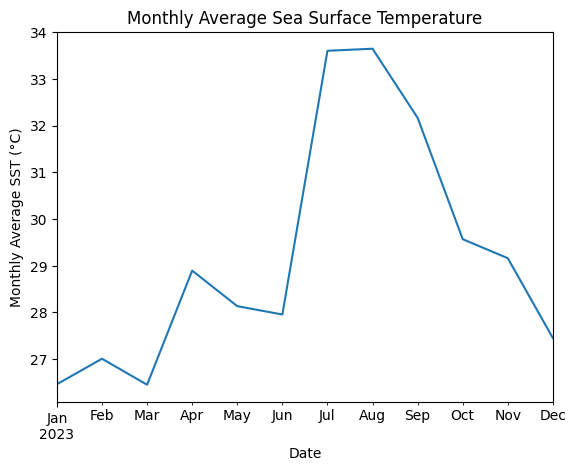

In [31]:
import matplotlib.pyplot as plt
df['SST'] = pd.to_numeric(df['SST'], errors='coerce')

# Calculate monthly average SST
SST_Monthly_Avg = df['SST'].resample('M').mean()

# Plot the monthly averages
SST_Monthly_Avg.plot()
plt.xlabel('Date')
plt.ylabel('Monthly Average SST (°C)')
plt.title('Monthly Average Sea Surface Temperature')
plt.show()


<ipython-input-32-9bbe777dcb5c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SST_Monthly_Avg = df['SST'].resample('M').mean()


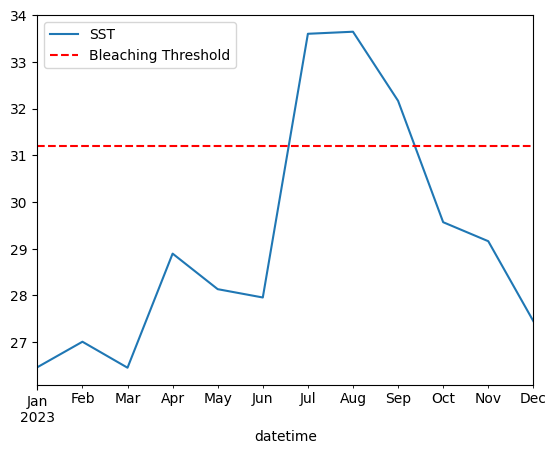

In [32]:
import matplotlib.pyplot as plt
# Calculate monthly average SST (already done in previous step)
SST_Monthly_Avg = df['SST'].resample('M').mean()

# Calculate threshold
threshold = SST_Monthly_Avg.mean() + 2

# Plot monthly averages (already done in previous step)
SST_Monthly_Avg.plot()

# Add threshold line to the plot
plt.axhline(y=threshold, color='r', linestyle='--', label='Bleaching Threshold')
plt.legend()  # Show the legend
plt.show()    # Display the plot

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df is already defined and SST data is cleaned

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

# Resample the data to daily average
df['SST_Daily_Avg'] = df['SST'].resample('D').mean()

# Then resample the daily average to monthly average
df['SST_Monthly_Avg'] = df['SST_Daily_Avg'].resample('ME').mean()

# Check the DataFrame columns
print("Columns in DataFrame:", df.columns)

# Drop NaN values from 'SST_Monthly_Avg'
df = df.dropna(subset=['SST_Monthly_Avg'])

# Prepare data for linear regression
X = df.index.factorize()[0].reshape(-1, 1)
y = df['SST_Monthly_Avg'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict future values for the next 12 months
future_X = [[i] for i in range(len(X), len(X) + 12)]
future_predictions = model.predict(future_X)

# Print the predictions for the next 12 months
print(future_predictions)


Columns in DataFrame: Index(['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE', 'SST',
       'SST_Daily_Avg', 'SST_Monthly_Avg'],
      dtype='object')
[32.40819045 32.91495827 33.42172609 33.9284939  34.43526172 34.94202954
 35.44879736 35.95556517 36.46233299 36.96910081 37.47586863 37.98263644]


In [19]:
df

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,SST,SST_Daily_Avg,SST_Monthly_Avg
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-31,2023,01,31,00,00,269,7.2,9.1,99.00,99.00,...,999,1017.7,20.6,999.0,999.0,99.0,99.00,999.0,34.058333,26.461412
2023-02-28,2023,02,28,00,00,170,6.9,9.1,99.00,99.00,...,999,1010.8,19.4,23.9,999.0,99.0,99.00,23.9,30.345139,27.007217
2023-03-31,2023,03,31,00,00,336,7.1,9.4,99.00,99.00,...,999,1027.7,14.2,20.7,999.0,99.0,99.00,20.7,21.078472,26.450829
2023-04-30,2023,04,30,00,00,198,4.6,6.2,99.00,99.00,...,999,1011.4,21.5,20.8,999.0,99.0,99.00,20.8,41.064583,28.907896
2023-05-31,2023,05,31,00,00,80,10.1,12.9,99.00,99.00,...,999,1011.9,22.3,22.8,999.0,99.0,99.00,22.8,30.189583,28.183511
2023-06-30,2023,06,30,00,00,129,3.4,4.4,99.00,99.00,...,999,1015.8,25.4,25.8,24.1,99.0,99.00,25.8,39.059722,27.902096
2023-07-31,2023,07,31,00,00,40,9.2,11.6,99.00,99.00,...,999,1009.9,24.6,28.7,23.9,99.0,99.00,28.7,42.056944,33.597140
2023-08-31,2023,8,31,0,0,243,4.9,6.1,99.0,99.0,...,999,1007.9,28.4,28.6,26.2,99.0,99.0,28.6,48.522917,33.650005
2023-09-30,2023,9,30,0,0,190,8.1,9.8,99.0,99.0,...,999,1012.9,25.4,26.4,24.0,99.0,99.0,26.4,33.100694,32.157694


In [20]:
df.head(5)

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,SST,SST_Daily_Avg,SST_Monthly_Avg
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-31,2023,01,31,00,00,269,7.2,9.1,99.00,99.00,...,999,1017.7,20.6,999.0,999.0,99.0,99.00,999.0,34.058333,26.461412
2023-02-28,2023,02,28,00,00,170,6.9,9.1,99.00,99.00,...,999,1010.8,19.4,23.9,999.0,99.0,99.00,23.9,30.345139,27.007217
2023-03-31,2023,03,31,00,00,336,7.1,9.4,99.00,99.00,...,999,1027.7,14.2,20.7,999.0,99.0,99.00,20.7,21.078472,26.450829
2023-04-30,2023,04,30,00,00,198,4.6,6.2,99.00,99.00,...,999,1011.4,21.5,20.8,999.0,99.0,99.00,20.8,41.064583,28.907896
2023-05-31,2023,05,31,00,00,80,10.1,12.9,99.00,99.00,...,999,1011.9,22.3,22.8,999.0,99.0,99.00,22.8,30.189583,28.183511


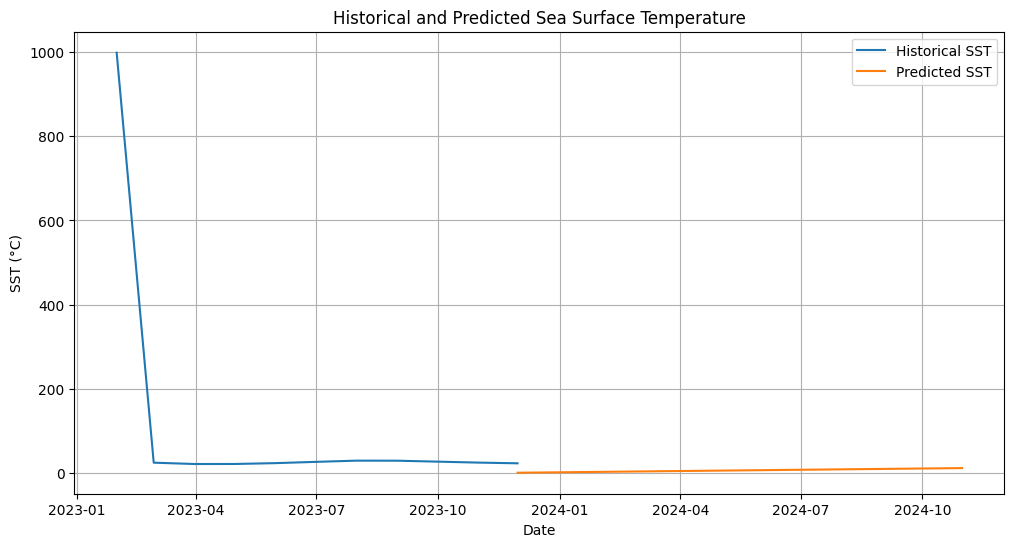

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for plotting
# Ensure 'df' has 'SST_Monthly_Avg' computed as shown in previous examples
# Generate example future predictions (replace with your actual predictions)
future_predictions = [float(i) for i in range(12)]  # Example data for future predictions

# Generate date range for future predictions
future_dates = pd.date_range(start=df.index[-1], periods=12, freq='ME')

# Plot historical SST and future predictions
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['SST'], label='Historical SST')  # Replace 'SST' with the actual column name if needed
plt.plot(future_dates, future_predictions, label='Predicted SST')

plt.xlabel('Date')
plt.ylabel('SST (°C)')
plt.title('Historical and Predicted Sea Surface Temperature')
plt.legend()
plt.grid(True)

plt.show()


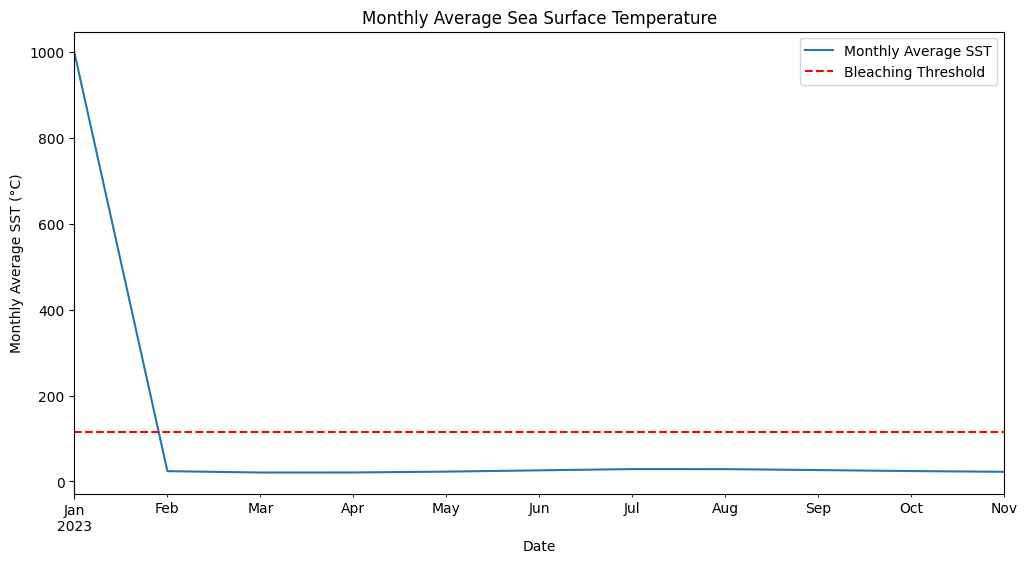

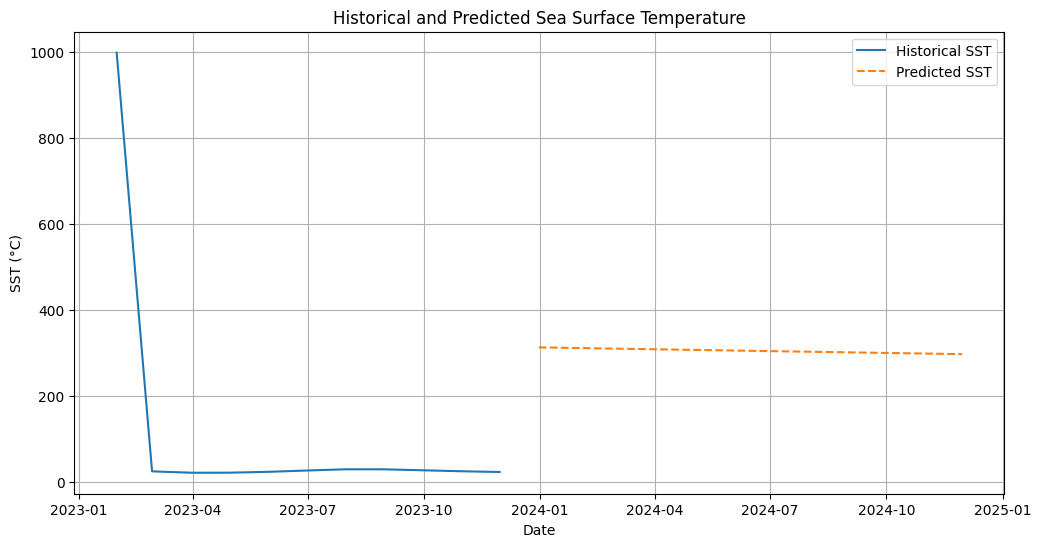

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame and has been cleaned

# Construct the 'datetime' column from single-level columns
df['datetime'] = pd.to_datetime(df['#YY'].astype(str) + '-' +
                                df['MM'].astype(str) + '-' +
                                df['DD'].astype(str) + ' ' +
                                df['hh'].astype(str) + ':' +
                                df['mm'].astype(str))

# Set 'datetime' as the index
df = df.set_index('datetime')

# Remove rows where 'WTMP' has the placeholder value '999.0'
df = df[df['WTMP'] != 999.0]

# Convert 'WTMP' (SST) to numeric, handle non-numeric values by converting to NaN
df['SST'] = pd.to_numeric(df['WTMP'], errors='coerce')

# Drop rows where 'SST' is NaN
df = df.dropna(subset=['SST'])

# Select only numeric columns for resampling to avoid errors
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Resample the DataFrame using only numeric columns
df_numeric_resampled = df[numeric_columns].resample('ME').mean()

# Calculate monthly average SST using the updated 'ME' frequency
SST_Monthly_Avg = df_numeric_resampled['SST']

# Plot the monthly averages
plt.figure(figsize=(12, 6))
SST_Monthly_Avg.plot(label='Monthly Average SST')
threshold = SST_Monthly_Avg.mean() + 2
plt.axhline(y=threshold, color='r', linestyle='--', label='Bleaching Threshold')
plt.xlabel('Date')
plt.ylabel('Monthly Average SST (°C)')
plt.title('Monthly Average Sea Surface Temperature')
plt.legend()
plt.show()

# Create a DataFrame from the monthly averages
SST_Monthly_Avg_df = SST_Monthly_Avg.reset_index()
SST_Monthly_Avg_df.columns = ['datetime', 'SST_Monthly_Avg']

# Drop the 'SST_Monthly_Avg' column from the original DataFrame if it exists to avoid duplicates
if 'SST_Monthly_Avg' in df.columns:
    df = df.drop(columns=['SST_Monthly_Avg'])

# Merge the monthly averages back to the original DataFrame
df = df.merge(SST_Monthly_Avg_df, on='datetime', suffixes=('', '_monthly_avg'))

# Drop rows with NaN values in 'SST_Monthly_Avg'
df = df.dropna(subset=['SST_Monthly_Avg'])

# Prepare data for linear regression
X = (df['datetime'] - df['datetime'].min()).dt.days.values.reshape(-1, 1)
y = df['SST_Monthly_Avg'].values

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future SST for the next 12 months
future_X = [[i] for i in range(len(X), len(X) + 12)]
future_predictions = model.predict(future_X)

# Generate future dates
future_dates = pd.date_range(start=df['datetime'].max() + pd.DateOffset(months=1), periods=12, freq='ME')

# Plot historical SST and future predictions
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['SST_Monthly_Avg'], label='Historical SST')
plt.plot(future_dates, future_predictions, label='Predicted SST', linestyle='--')
plt.xlabel('Date')
plt.ylabel('SST (°C)')
plt.title('Historical and Predicted Sea Surface Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df.head())